# Predicting Buying Session - Building Final Model

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import joblib

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
onehot = OneHotEncoder()
for feat in ['Month', 'OperatingSystems', 'Browser', 'Region',
             'TrafficType', 'VisitorType']:
    onehotvalue = onehot.fit_transform(df[feat].values.reshape(-1,1)).toarray()
    onehotcols = pd.DataFrame(onehotvalue, columns = [
        feat + '_' + str(onehot.categories_[0][i])
        for i in range(len(onehot.categories_[0]))
    ])
    df = pd.concat([df, onehotcols], axis = 1)
    print(f'{feat} encoded')
    df = df.drop(columns=feat)

Month encoded
OperatingSystems encoded
Browser encoded
Region encoded
TrafficType encoded
VisitorType encoded


In [5]:
label_encoder = LabelEncoder()
for column in ['Weekend', 'Revenue']:
    df[column] = label_encoder.fit_transform(df[column])
    print({index: label for index, label in enumerate(label_encoder.classes_)})
    print(f'{column} encoded')

{0: False, 1: True}
Weekend encoded
{0: False, 1: True}
Revenue encoded


In [6]:
df = df[['Revenue',
         'Administrative_Duration',
         'Informational_Duration',
         'ProductRelated_Duration',
         'BounceRates',
         'PageValues',
         'SpecialDay',
         'Month_Mar',
         'Month_May',
         'Month_Nov',
         'OperatingSystems_3',
         'TrafficType_1',
         'TrafficType_2',
         'TrafficType_3',
         'TrafficType_13',
         'VisitorType_New_Visitor',
         'VisitorType_Returning_Visitor'
         ]]
df.shape

(12330, 17)

In [7]:
num_feats = ['Administrative_Duration',
             'Informational_Duration',
             'ProductRelated_Duration',
             'BounceRates',
             'PageValues',
             'SpecialDay']

In [8]:
robust = RobustScaler()
df_robust = pd.DataFrame(robust.fit_transform(df[num_feats]), columns=num_feats)
df_robust = pd.concat([df_robust, df.drop(columns=num_feats)], axis=1)
df_robust.describe()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Revenue,Month_Mar,Month_May,Month_Nov,OperatingSystems_3,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_13,VisitorType_New_Visitor,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,1.233000e+04,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.786206,34.472398,4.654689e-01,1.134801,5.889258,0.061427,0.154745,0.154663,0.272830,0.243147,0.207218,0.198783,0.317356,0.166423,0.059854,0.137388,0.855718
std,1.895627,140.749294,1.495031e+00,2.884054,18.568437,0.198917,0.361676,0.361598,0.445432,0.429000,0.405330,0.399101,0.465466,0.372475,0.237226,0.344271,0.351390
min,-0.080424,0.000000,-4.679123e-01,-0.185128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.080424,0.000000,-3.240570e-01,-0.185128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,4.440824e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.919576,0.000000,6.759430e-01,0.814872,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,36.364855,2549.375000,4.951063e+01,11.710742,361.763742,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X_rob = df_robust.drop(columns='Revenue')
y_rob = df_robust['Revenue']

x_train_rob, x_test_rob, y_train_rob, y_test_rob = train_test_split(X_rob, y_rob, test_size = 0.20)

for data in [x_train_rob, x_test_rob, y_train_rob, y_test_rob]:
    print(data.shape)

(9864, 16)
(2466, 16)
(9864,)
(2466,)


In [10]:
x_train_rob.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay',
       'Month_Mar', 'Month_May', 'Month_Nov', 'OperatingSystems_3',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_13',
       'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [11]:
sm = SMOTE() 
x_train_rob_sm, y_train_rob_sm = sm.fit_sample(x_train_rob, y_train_rob) 

Train score: 89.3%
Test score: 85.52%

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2080
           1       0.53      0.77      0.63       386

    accuracy                           0.86      2466
   macro avg       0.74      0.82      0.77      2466
weighted avg       0.89      0.86      0.87      2466



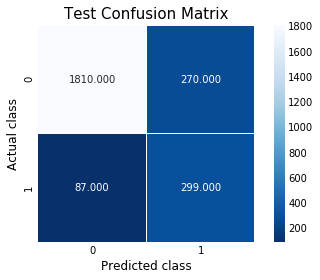

In [12]:
model_svm = SVC(kernel='rbf', 
                 C=1.0,
                 gamma='auto',
                )
model_svm.fit(x_train_rob_sm, y_train_rob_sm)
y_pred_rob_sm = model_svm.predict(x_test_rob)

print(f'Train score: {round(model_svm.score(x_train_rob_sm, y_train_rob_sm)*100, 2)}%')
print(f'Test score: {round(model_svm.score(x_test_rob, y_test_rob)*100, 2)}%\n')

print(classification_report(y_test_rob, y_pred_rob_sm))

cm = confusion_matrix(y_test_rob, y_pred_rob_sm)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.title('Test Confusion Matrix', size = 15)
plt.show()

In [13]:
cv_svm = cross_val_score(estimator=model_svm,
                         X=x_train_rob_sm,
                         y=y_train_rob_sm,
                         # The recall is the ratio tp / (tp + fn)
                         scoring='recall',
                         n_jobs=-1,
                         # For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
                         cv=5
                         )
cv_svm

array([0.86099461, 0.85200719, 0.87110312, 0.85371703, 0.85371703])

In [14]:
print(cv_svm.mean())
print(cv_svm.std())

0.8583077935494625
0.007110375193613171


In [15]:
cv_svm = cross_val_score(estimator=model_svm,
                         X=X_rob,
                         y=y_rob,
                         # The recall is the ratio tp / (tp + fn)
                         scoring='recall',
                         n_jobs=-1,
                         # For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
                         cv=5
                         )
cv_svm

array([0.47120419, 0.58638743, 0.5       , 0.37270341, 0.42782152])

In [16]:
print(cv_svm.mean())
print(cv_svm.std())

0.4716233114839703
0.07166583466859068


In [65]:
model_svm.predict([x_train_rob.iloc[0]])

array([0], dtype=int32)

In [66]:
y_train_rob.iloc[0]

0

In [21]:
joblib.dump(model_svm, 'my_model')
joblib.dump(robust, 'my_scaler')

['my_scaler']